In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline
raw_data= np.random.randint(0,255,(3,100))


[[[ 0.75200559  0.30157946  0.91307814]
  [ 0.59511324  0.42381967  0.68031092]
  [ 0.02111792  0.29073188  0.30250201]
  [ 0.4930028   0.21312873  0.70388416]
  [ 0.64062659  0.41067565  0.64815625]]

 [[ 0.31487154  0.46851803  0.12533878]
  [ 0.8702072   0.73709881  0.44530173]
  [ 0.86321127  0.21546822  0.30900592]
  [ 0.6114278   0.43541064  0.36868657]
  [ 0.28238396  0.41898035  0.07943218]]

 [[ 0.77940674  0.36851916  0.43744884]
  [ 0.74129117  0.65178151  0.68852951]
  [ 0.39966797  0.54987992  0.49703002]
  [ 0.2776494   0.6026184   0.93290247]
  [ 0.8392288   0.84383634  0.97332405]]

 [[ 0.61250057  0.77780938  0.29023574]
  [ 0.02506352  0.22472344  0.20933129]
  [ 0.63855904  0.79952173  0.61201159]
  [ 0.14824854  0.53407583  0.59428059]
  [ 0.2560809   0.04157178  0.52575573]]

 [[ 0.1409405   0.76117308  0.43620016]
  [ 0.40632138  0.91183395  0.9063567 ]
  [ 0.80873989  0.76632785  0.35772705]
  [ 0.99405885  0.45662478  0.87078278]
  [ 0.40743814  0.26265607  0.91

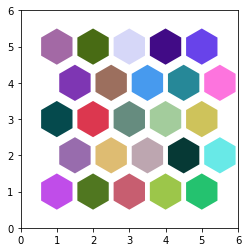

In [2]:
network_dimensions = np.array([5, 5])
n_iterations = 2000
init_learning_rate = 0.01
  
m = raw_data.shape[0]
n = raw_data.shape[1]
  
net = np.random.random((network_dimensions[0], network_dimensions[1], m))
print(net)  
init_radius = max(network_dimensions[0], network_dimensions[1]) / 2
  
time_constant = n_iterations / np.log(init_radius)

fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.shape[0]+1))
ax.set_ylim((0, net.shape[1]+1))



for x in range(1, net.shape[0] + 1):
    for y in range(1, net.shape[1] + 1):
        if (y%2 ==0):
                ax.add_patch(patches.RegularPolygon((x+0.5, y), 6, 0.5,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
        else:        
            ax.add_patch(patches.RegularPolygon((x, y), 6, 0.5,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
plt.show()

In [3]:
    
    data = raw_data

    
    data = raw_data / data.max()
    
    
t = data[:, np.random.randint(0, n)].reshape(np.array([m, 1]))


In [4]:
#     bmu_idx = np.array([0, 0])
#     min_dist = np.iinfo(np.int).max

    
#     for x in range(net.shape[0]):
#         for y in range(net.shape[1]):
#             w = net[x, y, :].reshape(m, 1)
#             print("weight:")
#             print(w)
#             sq_dist = np.sum((w - t) ** 2)
#             if sq_dist < min_dist:
#                 min_dist = sq_dist
#                 bmu_idx = np.array([x, y])
#                 print("Min Dist")
#                 print(min_dist)
#                 print("BMU_INDEX")
#                 print(bmu_idx)
    
    
#     bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
#     print(bmu)
#     print(bmu_idx)

In [5]:
def find_bmu(t, net, m):
   
    bmu_idx = np.array([0, 0])
    
    min_dist = np.iinfo(np.int).max
    
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            
            sq_dist = np.sum((w - t) ** 2)
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x, y])
    
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    
    return (bmu, bmu_idx)

In [6]:
def decay_radius(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)

def decay_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)
def calculate_influence(distance, radius):
    return np.exp(-distance / (2* (radius**2)))


In [7]:
for i in range(n_iterations):
    t = data[:, np.random.randint(0, n)].reshape(np.array([m, 1]))
    
    bmu, bmu_idx = find_bmu(t, net, m)
    
    r = decay_radius(init_radius, i, time_constant)
    l = decay_learning_rate(init_learning_rate, i, n_iterations)
    
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
            if w_dist <= r**2:
                influence = calculate_influence(w_dist, r)
                new_w = w + (l * influence * (t - w))
                net[x, y, :] = new_w.reshape(1, 3)

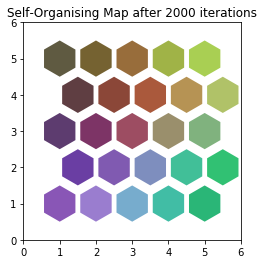

In [8]:
fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.shape[0]+1))
ax.set_ylim((0, net.shape[1]+1))
ax.set_title('Self-Organising Map after %d iterations' % n_iterations)


for x in range(1, net.shape[0] + 1):
    for y in range(1, net.shape[1] + 1):
        if (y%2 ==0):
                ax.add_patch(patches.RegularPolygon((x+0.5, y), 6, 0.5,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
        else:        
            ax.add_patch(patches.RegularPolygon((x, y), 6, 0.5,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
plt.show()